-100000000


,pivots,iterations,time_complexity
count,15400.000000,15400.00000,1.540000e+04
mean,39.000000,100.50000,-3.560537e+05
std,22.226832,57.73618,2.839182e+05
min,1.000000,1.00000,-1.293314e+06
25%,20.000000,50.75000,-5.298343e+05
50%,39.000000,100.50000,-2.791108e+05
75%,58.000000,150.25000,-1.222849e+05
max,77.000000,200.00000,-1.067543e+03


,pivots,iterations,time_complexity
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


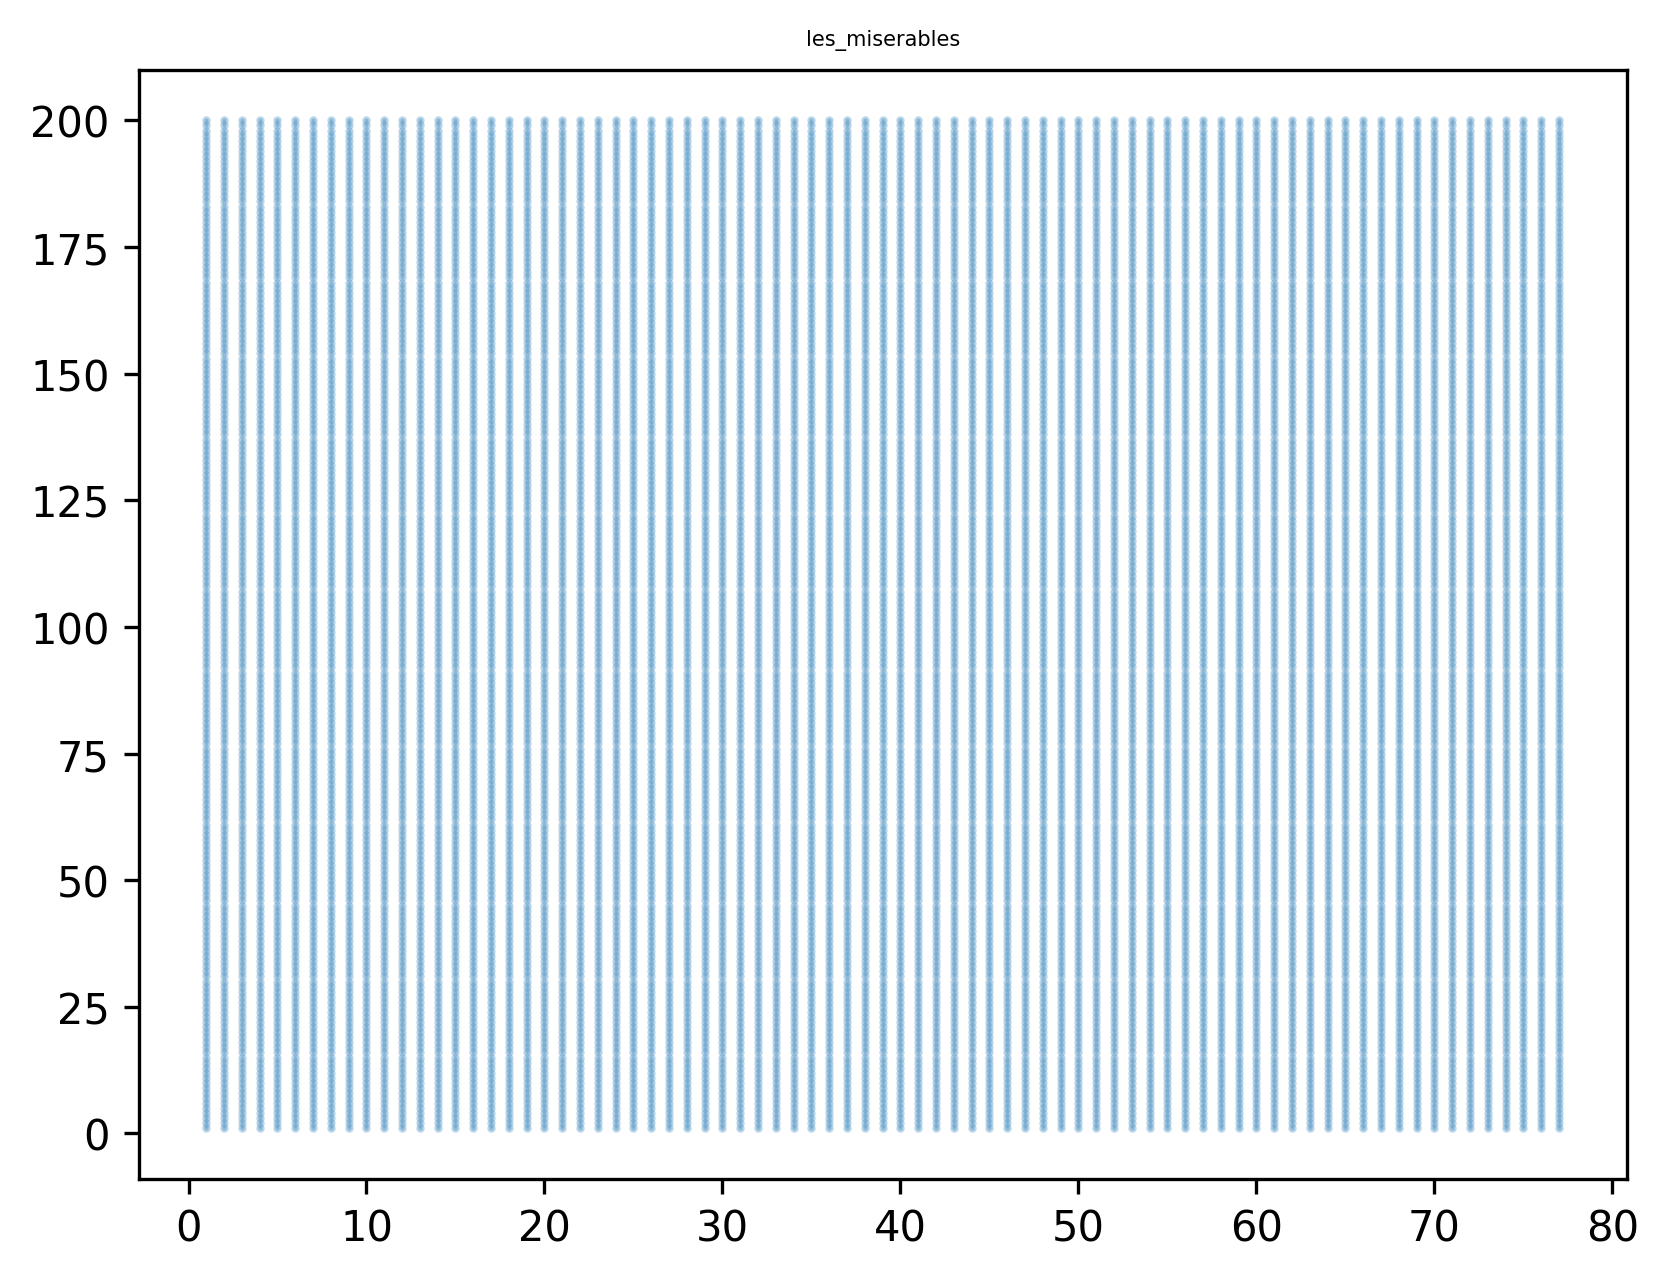

-100000000


,pivots,iterations,time_complexity
count,162788.000000,162788.000000,1.627880e+05
mean,454.506094,81.428938,-4.045618e+07
std,302.127656,54.108982,2.792615e+07
min,1.000000,1.000000,-9.999649e+07
25%,204.000000,36.000000,-6.231323e+07
50%,407.000000,72.000000,-3.565191e+07
75%,672.000000,122.000000,-1.622892e+07
max,1138.000000,200.000000,-1.560730e+04


,pivots,iterations,time_complexity
count,64812.000000,64812.000000,6.481200e+04
mean,858.329661,148.400697,-1.536502e+08
std,181.874597,33.819095,4.001104e+07
min,415.000000,66.000000,-2.741073e+08
25%,719.000000,122.000000,-1.805494e+08
50%,878.000000,152.000000,-1.454060e+08
75%,1014.000000,177.000000,-1.201142e+08
max,1138.000000,200.000000,-1.000017e+08


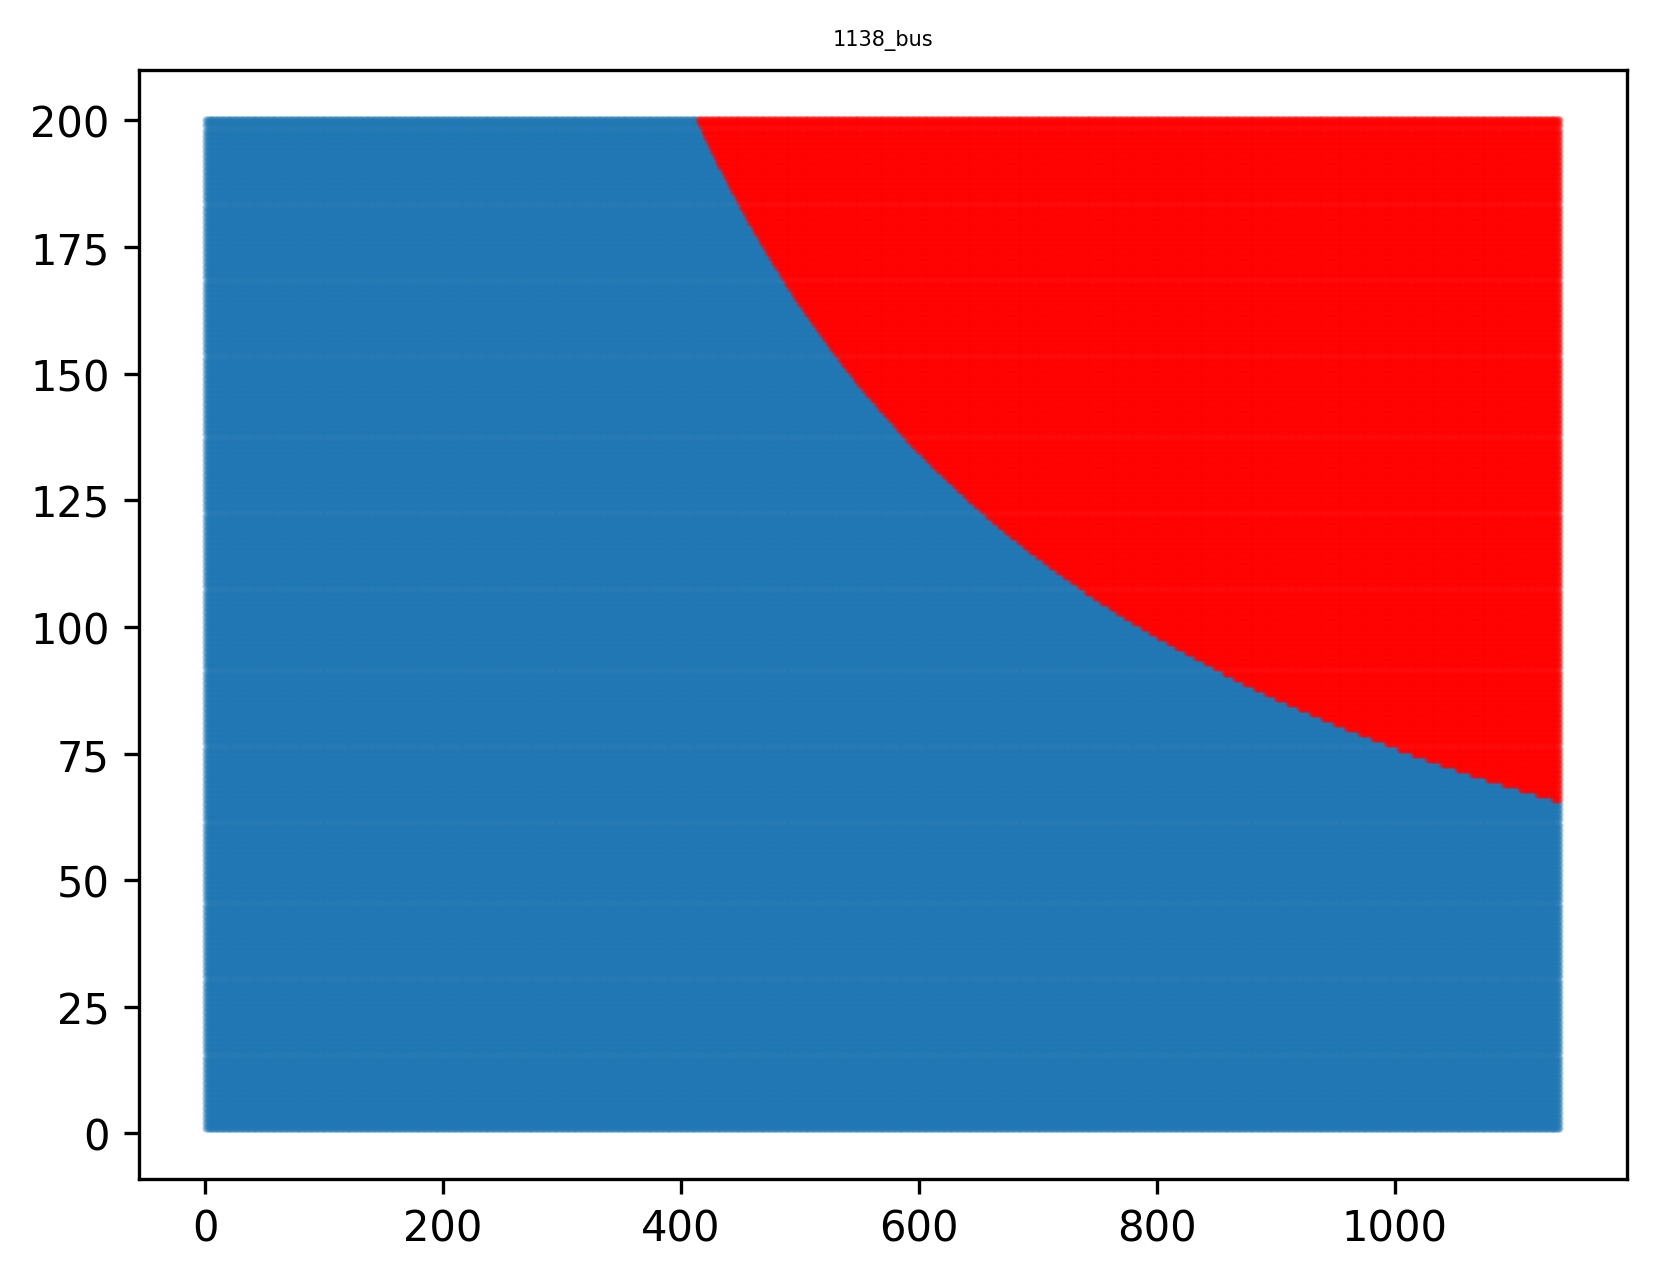

-100000000


,pivots,iterations,time_complexity
count,54724.000000,54724.000000,5.472400e+04
mean,246.810412,59.660094,-5.028512e+07
std,254.804050,54.496054,2.870198e+07
min,1.000000,1.000000,-9.999311e+07
25%,69.000000,14.000000,-7.514765e+07
50%,151.000000,41.000000,-5.027647e+07
75%,339.250000,94.000000,-2.543583e+07
max,1385.000000,200.000000,-7.875797e+04


,pivots,iterations,time_complexity
count,933476.000000,933476.000000,9.334760e+05
mean,2601.390659,102.894194,-1.472558e+09
std,1357.536391,57.017993,1.128871e+09
min,94.000000,1.000000,-5.216164e+09
25%,1441.000000,54.000000,-2.166966e+09
50%,2608.000000,104.000000,-1.170670e+09
75%,3775.000000,152.000000,-5.415888e+08
max,4941.000000,200.000000,-1.000050e+08


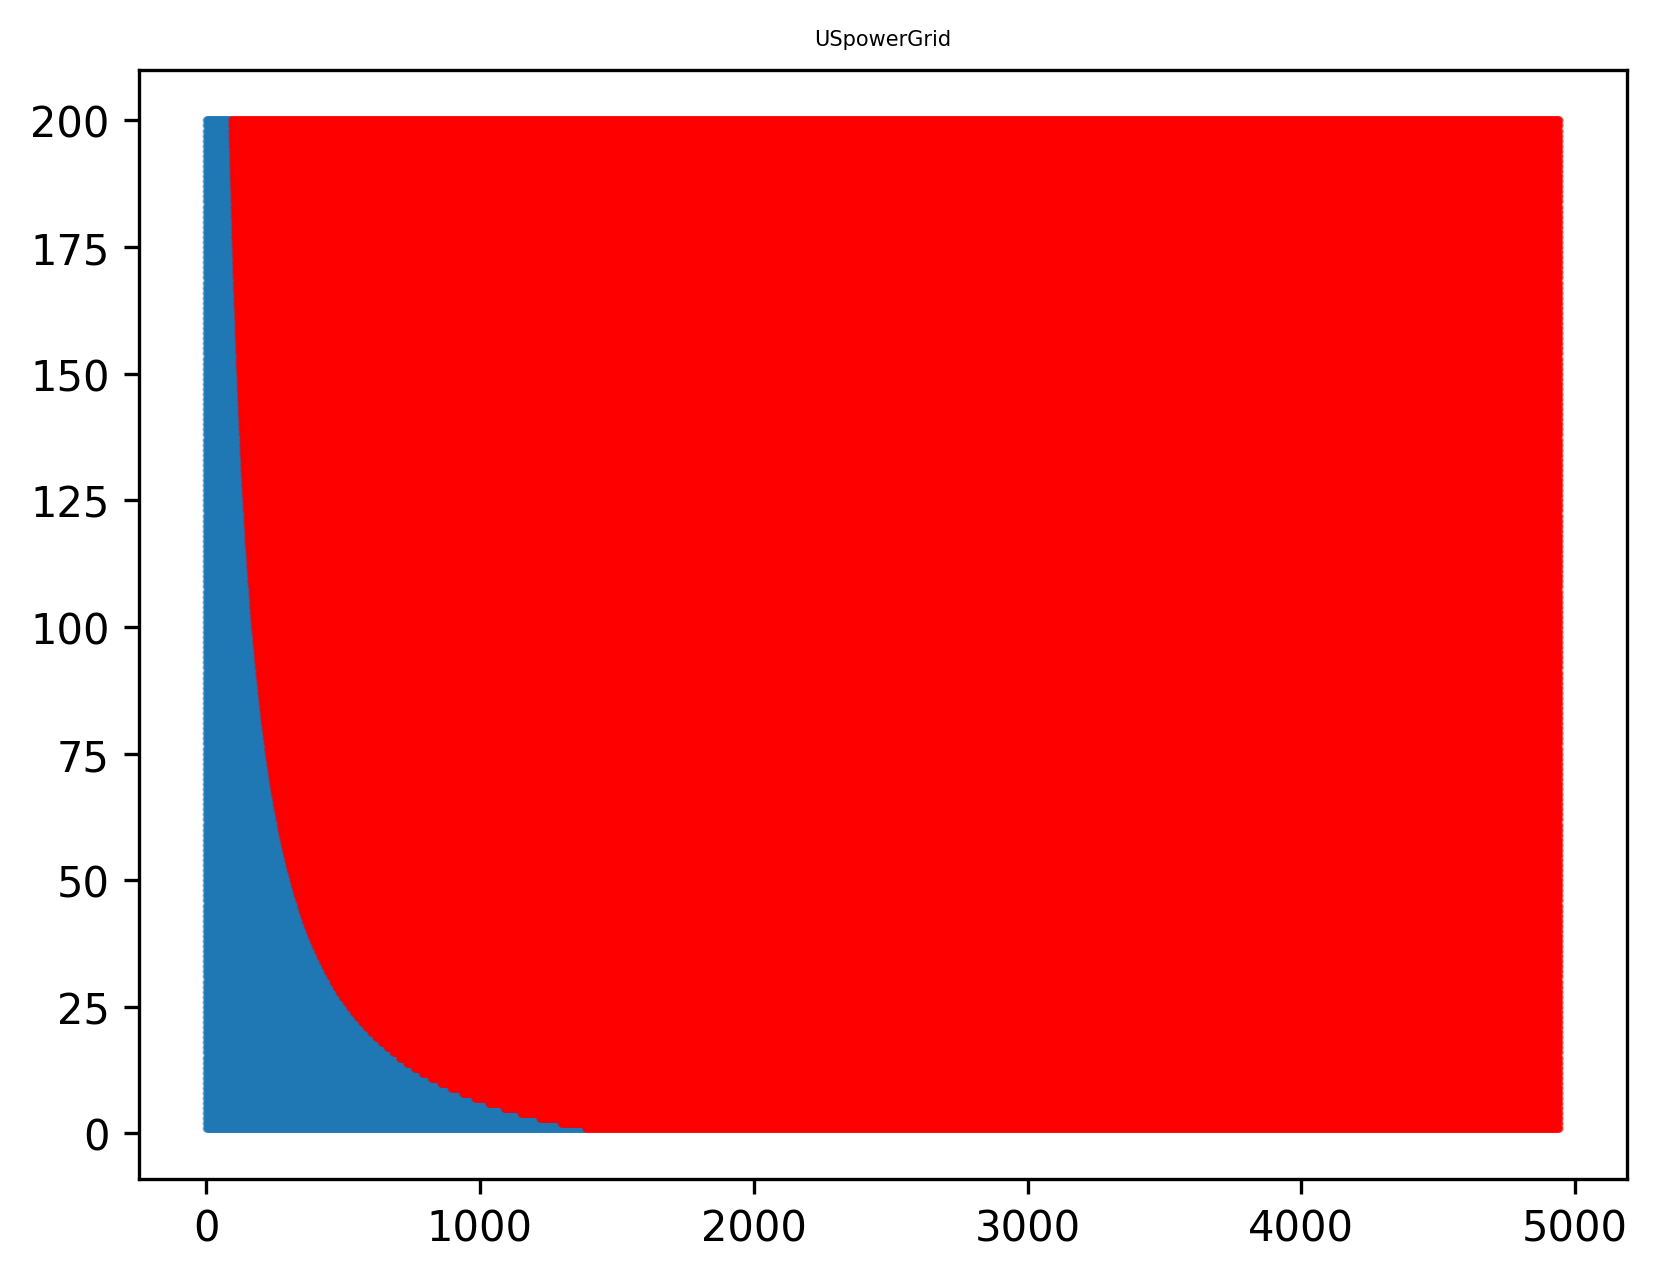

-100000000


,pivots,iterations,time_complexity
count,161533.000000,161533.000000,1.615330e+05
mean,430.093684,86.654504,-3.895874e+07
std,270.602791,54.510296,2.751429e+07
min,1.000000,1.000000,-9.999817e+07
25%,202.000000,41.000000,-5.983287e+07
50%,404.000000,81.000000,-3.364150e+07
75%,634.000000,129.000000,-1.525488e+07
max,1005.000000,200.000000,-1.864384e+04


,pivots,iterations,time_complexity
count,39467.000000,39467.000000,3.946700e+04
mean,801.395520,157.167710,-1.366660e+08
std,134.772167,28.611874,2.699731e+07
min,462.000000,85.000000,-2.166666e+08
25%,700.000000,136.000000,-1.550161e+08
50%,818.000000,161.000000,-1.313113e+08
75%,917.000000,182.000000,-1.139921e+08
max,1005.000000,200.000000,-1.000001e+08


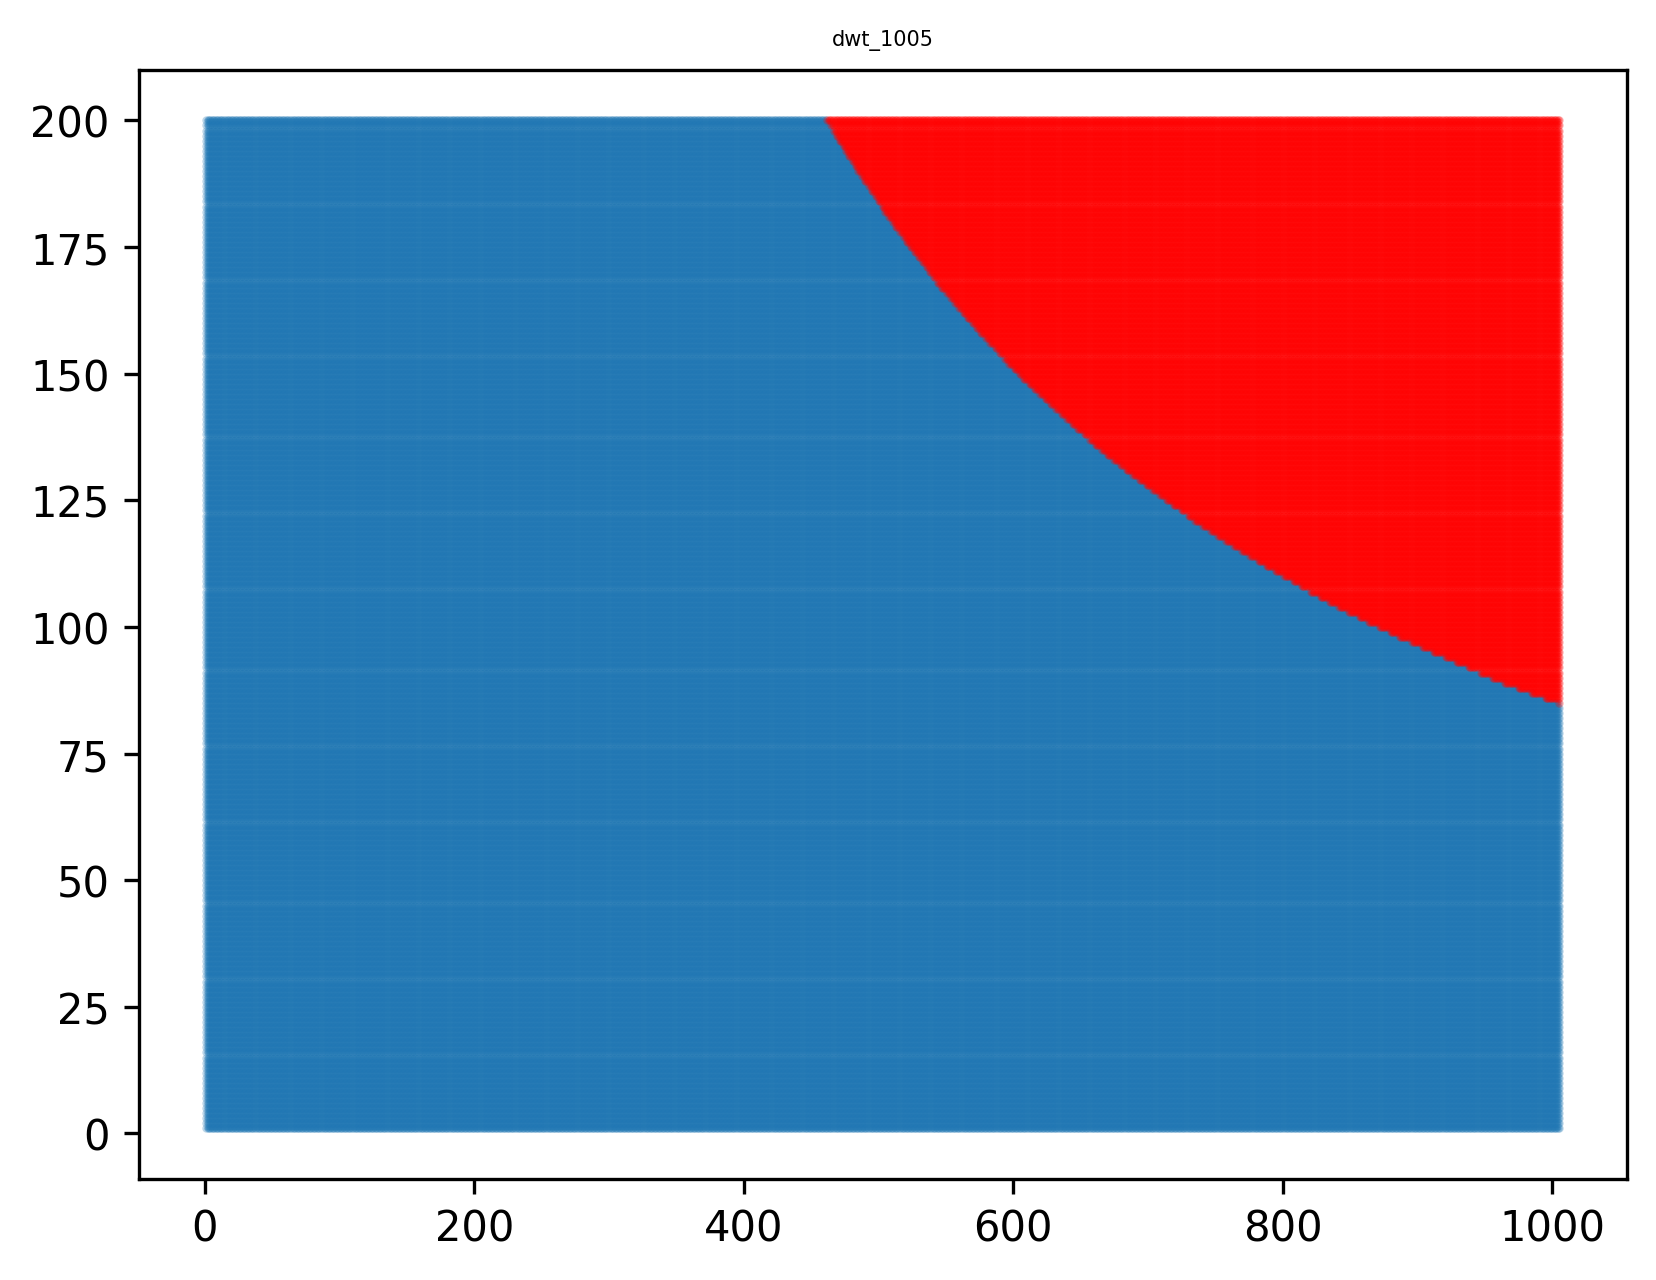

In [46]:
# Standard Library
import argparse
import math

# Third Party Library
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from egraph import Drawing, all_sources_bfs
from ex_utils.config.dataset import dataset_names
from ex_utils.config.paths import get_dataset_path
from ex_utils.config.quality_metrics import qm_name_abbreviations, qm_names
from ex_utils.share import (
    draw_and_measure,
    ex_path,
    generate_base_df_data,
    generate_mmscalers,
    generate_sscalers,
)
from ex_utils.utils.graph import (
    egraph_graph,
    load_nx_graph,
    nx_graph_preprocessing,
)
import numpy as np
from ex_utils.quality_metrics import time_complexity


n_bins = 50
EDGE_WEIGHT = 30

p_names = ["params_pivots", "params_iterations", "params_eps"]

for d_name in ["les_miserables", "1138_bus", "USpowerGrid", "dwt_1005"]:
    dataset_path = get_dataset_path(d_name)
    nx_graph = nx_graph_preprocessing(
        load_nx_graph(dataset_path=dataset_path), EDGE_WEIGHT
    )
    n_nodes = len(nx_graph.nodes)
    n_edges = len(nx_graph.edges)

    df_data = []
    for pivots in range(1, n_nodes + 1):
        for iterations in range(1, 200 + 1):
            df_data.append(
                {
                    "pivots": pivots,
                    "iterations": iterations,
                    "time_complexity": -time_complexity.measure(
                        pivots, iterations, n_nodes, n_edges
                    ),
                }
            )
    df = pd.DataFrame(df_data)
    # display(df.describe())
    fig, ax = plt.subplots(dpi=300, facecolor="white")
    # ax.set_aspect("equal")
    ax.set_title(f"{d_name}", fontsize=5)
    # df["v"] = df["pivots"] / n_nodes + df["iterations"] / 200

    # max_time = -np.sqrt(
    #     time_complexity.measure(n_nodes, 200, n_nodes, n_edges)
    # ) * (np.sqrt(time_complexity.measure(1, 1, n_nodes, n_edges)))
    l = time_complexity.measure(n_nodes, 200, n_nodes, n_edges)
    s = time_complexity.measure(1, 1, n_nodes, n_edges)
    # max_time = -(l + s) / 2
    max_time = -(np.sqrt(l * s))
    # max_time = -np.sqrt(l) * np.sqrt(s)
    max_time = -(10**8)
    print(max_time)

    adf = df.query(f"time_complexity > {max_time}")
    bdf = df.query(f"time_complexity <= {max_time}")
    ax.scatter(adf["pivots"], adf[f"iterations"], s=1, alpha=0.3)
    ax.scatter(bdf["pivots"], bdf[f"iterations"], s=1, alpha=0.3, color="red")
    display(adf.describe(), bdf.describe())
    plt.show()

In [27]:
time_complexity.measure(n_nodes, 200, n_nodes, n_edges)

216666598.9084216

In [28]:
c = 10**8
f = {"s": True, "l": True, "e": True}
for size in range(1, 100000):
    edges = size
    s = time_complexity.measure(1, 1, size, edges)
    l = time_complexity.measure(size, 200, size, edges)
    e = time_complexity.measure(50, 100, size, edges)
    if s > c and f["s"]:
        f["s"] = False
        print("s", size, edges, s)
    if l > c and f["l"]:
        f["l"] = False
        print("l", size, edges, l)
    if e > c and f["e"]:
        f["e"] = False
        print("e", size, edges, e)

l 689 689 100032561.56954636
e 17086 17086 100004808.27337965


In [29]:
size = 689
edges = 689
time_complexity.measure(size, 200, size, edges)

100032561.56954636

In [39]:
c = 10**8
f = {"s": True, "l": True, "e": True}
size, edges = 4941, 6594
for p in range(1, 1000):
    s = time_complexity.measure(p, 200, size, edges)
    # l = time_complexity.measure(size, 200, size, edges)
    # e = time_complexity.measure(50, 100, size, edges)
    if s > c and f["s"]:
        print(p)
        f["s"] = False
        print("s", size, edges, s)
    # if l > c and f["l"]:
    #     f["l"] = False
    #     print("l", size, edges, l)
    # if e > c and f["e"]:
    #     f["e"] = False
    #     print("e", size, edges, e)

94
s 4941 6594 100528559.37262021
